<a href="https://colab.research.google.com/github/JunandaSap/TA/blob/main/ST_elevasi%26Amplitudo_R_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wfdb librosa matplotlib

import os
import zipfile
import wfdb
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE
from google.colab import drive
from google.colab import drive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 5.1 MB/s eta 0:00:00


In [ ]:
# Hubungkan Google Colab dengan Google Drive
drive.mount('/content/drive')

zip_file_path = '/content/drive/MyDrive/FiturEkstraksi'

# extract_dir = '/content/extracted_zip'
# os.makedirs(extract_dir, exist_ok=True)

# # Ekstrak file zip
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)
# print("File yang diekstrak:")
# print(os.listdir(extract_dir))

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# Direktori untuk menyimpan file gabungan
gabungan = '/content/gabunganfitur'
os.makedirs(gabungan, exist_ok=True)

# Fungsi untuk membaca semua CSV dalam folder dan menyimpannya ke folder gabungan
def process_and_save_csv(folder_path, gabungan_folder, prefix):
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]  # Hanya file CSV
    combined_dataframes = []

    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        try:
            print(f"Membaca file: {file_path}")
            df = pd.read_csv(file_path)
            combined_dataframes.append(df)
        except Exception as e:
            print(f"Gagal membaca file {csv_file}: {e}")

    # Gabungkan semua dataframes dalam folder
    if combined_dataframes:
        combined_df = pd.concat(combined_dataframes, ignore_index=True)
        output_file = os.path.join(gabungan_folder, f'{prefix}.csv')
        combined_df.to_csv(output_file, index=False)
        print(f"File gabungan disimpan ke: {output_file}")
    else:
        print(f"Tidak ada file CSV untuk digabungkan di folder: {folder_path}")

# Path folder
folder1_path = '/content/drive/MyDrive/FiturEkstraksi/STElevasi'
folder2_path = '/content/drive/MyDrive/FiturEkstraksi/AmplitudoRS'
folder3_path = '/content/drive/MyDrive/FiturEkstraksi/MIandNormal'

# Proses dan simpan CSV dari Folder 1
print("\nProses Folder 1 (STElevasi):")
if os.path.exists(folder1_path):
    process_and_save_csv(folder1_path, gabungan, 'STElevasi')
else:
    print(f"Folder 1 tidak ditemukan: {folder1_path}")

# Proses dan simpan CSV dari Folder 2
print("\nProses Folder 2 (AmplitudoRS):")
if os.path.exists(folder2_path):
    process_and_save_csv(folder2_path, gabungan, 'AmplitudoRS')
else:
    print(f"Folder 2 tidak ditemukan: {folder2_path}")

# Proses dan simpan CSV dari Folder 3
print("\nProses Folder 3 (MIandNormal):")
if os.path.exists(folder3_path):
    process_and_save_csv(folder3_path, gabungan, 'MIandNormal')
else:
    print(f"Folder 3 tidak ditemukan: {folder3_path}")



Proses Folder 1 (STElevasi):
Membaca file: /content/drive/MyDrive/FiturEkstraksi/STElevasi/st_elevations_features.csv
File gabungan disimpan ke: /content/gabunganfitur/STElevasi.csv

Proses Folder 2 (AmplitudoRS):
Membaca file: /content/drive/MyDrive/FiturEkstraksi/AmplitudoRS/rs_features_full.csv
File gabungan disimpan ke: /content/gabunganfitur/AmplitudoRS.csv

Proses Folder 3 (MIandNormal):
Membaca file: /content/drive/MyDrive/FiturEkstraksi/MIandNormal/ecg_mi_vs_normal_dataset.csv
File gabungan disimpan ke: /content/gabunganfitur/MIandNormal.csv


In [ ]:
!pip install niapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Baca dataset ST-elevasi, amplitudo RS, dan kelas multiklas
st_dataset = pd.read_csv('/content/gabunganfitur/STElevasi.csv')  # Dataset fitur ST-elevasi
rs_dataset = pd.read_csv('/content/gabunganfitur/AmplitudoRS.csv')  # Dataset fitur RS
class_dataset = pd.read_csv('/content/gabunganfitur/MIandNormal.csv')  # Dataset kelas multiklas

# Hilangkan '.hea' dari kolom patient_id di amplitudo RS
rs_dataset['patient_id'] = rs_dataset['patient_id'].str.replace('.hea', '', regex=False).str.strip()

# Rename kolom 'Record Name' menjadi 'patient_id' untuk konsistensi
st_dataset = st_dataset.rename(columns={'Record Name': 'patient_id'})
class_dataset = class_dataset.rename(columns={'Record Name': 'patient_id'})

# Gabungkan dataset berdasarkan kolom 'patient_id'
merged_dataset = pd.merge(st_dataset, rs_dataset, on='patient_id', how='inner')
merged_dataset = pd.merge(merged_dataset, class_dataset, on='patient_id', how='inner')

# Pisahkan fitur (X) dan label (y)
X = merged_dataset[['st_mean', 'st_std', 'st_max', 'st_min', 'st_range',
                    'Mean_RS', 'Max_RS', 'Min_RS', 'Std_RS']]  # Gabungan fitur
y = merged_dataset['Class']  # Target label (kelas multiklas)

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan SMOTE untuk menangani ketidakseimbangan kelas pada data pelatihan
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standarisasi fitur
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Inisialisasi dan training model SVM
model = SVC(C= 100.0, kernel= 'rbf', gamma= 0.9824819005302686)
model.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi performa model
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, zero_division=0))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Akurasi: 89.85%
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       160
           1       0.95      0.92      0.94       658

    accuracy                           0.90       818
   macro avg       0.83      0.86      0.85       818
weighted avg       0.90      0.90      0.90       818



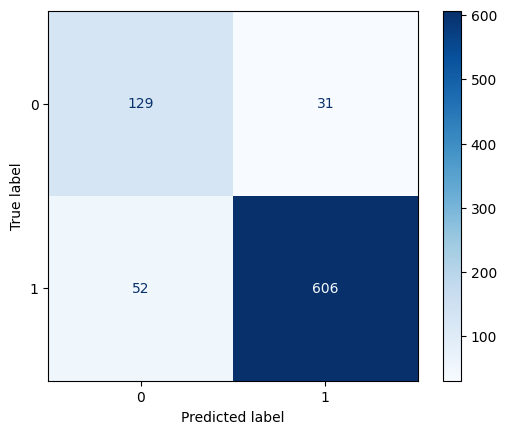

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Baca dataset ST-elevasi, amplitudo RS, dan kelas multiklas
st_dataset = pd.read_csv('/content/gabunganfitur/STElevasi.csv')  # Dataset fitur ST-elevasi
rs_dataset = pd.read_csv('/content/gabunganfitur/AmplitudoRS.csv')  # Dataset fitur RS
class_dataset = pd.read_csv('/content/gabunganfitur/MIandNormal.csv')  # Dataset kelas multiklas

# Hilangkan '.hea' dari kolom patient_id di amplitudo RS
rs_dataset['patient_id'] = rs_dataset['patient_id'].str.replace('.hea', '', regex=False).str.strip()

# Rename kolom 'Record Name' menjadi 'patient_id' untuk konsistensi
st_dataset = st_dataset.rename(columns={'Record Name': 'patient_id'})
class_dataset = class_dataset.rename(columns={'Record Name': 'patient_id'})

# Gabungkan dataset berdasarkan kolom 'patient_id'
merged_dataset = pd.merge(st_dataset, rs_dataset, on='patient_id', how='inner')
merged_dataset = pd.merge(merged_dataset, class_dataset, on='patient_id', how='inner')

# Pisahkan fitur (X) dan label (y)
X = merged_dataset[['st_mean', 'st_std', 'st_max', 'st_min', 'st_range',
                    'Mean_RS', 'Max_RS', 'Min_RS', 'Std_RS']]  # Gabungan fitur
y = merged_dataset['Class']  # Target label (kelas multiklas)

# # 4. Hitung distribusi kelas sebelum split
# print("Distribusi Kelas Sebelum Split:")
# print(y.value_counts())

# 5. Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # 6. Hitung distribusi kelas setelah split
# print("Distribusi Kelas Setelah Split:")
# print("Training Set:")
# print(y_train.value_counts())
# print("Testing Set:")
# print(y_test.value_counts())

# 7. Terapkan SMOTE untuk menyeimbangkan kelas pada data pelatihan
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 8. Standarisasi fitur
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 9. Optimasi parameter SVM menggunakan GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 'scale'],
    'kernel': ['rbf'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_resampled, y_train_resampled)

# 10. Model terbaik dari GridSearch
best_model = grid_search.best_estimator_
print(f"Best Model Parameters: {grid_search.best_params_}")

# 11. Prediksi pada set pengujian
y_pred = best_model.predict(X_test)

# 12. Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# 13. Laporan klasifikasi
report = classification_report(y_test, y_pred, zero_division=0)
print("Laporan Klasifikasi:")
print(report)

# 14. Analisis confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Testing Set):")
print(cm)

# 15. Perhitungan sensitivitas, spesifisitas, dan F1-score
# Sensitivitas (Recall untuk kelas 1)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) != 0 else 0

# Spesifisitas (Recall untuk kelas 0)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0

# F1 Score makro (rata-rata antar kelas)
f1_scores = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['macro avg']['f1-score']

# Cetak hasil evaluasi
print(f"\nHasil Evaluasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Sensitivitas (Recall Kelas 1): {sensitivity:.2f}")
print(f"Spesifisitas (Recall Kelas 0): {specificity:.2f}")
print(f"F1 Score (Macro Average): {f1_scores:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best Model Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}
Akurasi: 86.92%
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       160
           1       0.93      0.90      0.92       658

    accuracy                           0.87       818
   macro avg       0.79      0.82      0.80       818
weighted avg       0.88      0.87      0.87       818

Confusion Matrix (Testing Set):
[[117  43]
 [ 64 594]]

Hasil Evaluasi:
Akurasi: 86.92%
Sensitivitas (Recall Kelas 1): 0.90
Spesifisitas (Recall Kelas 0): 0.73
F1 Score (Macro Average): 0.80


In [ ]:
# Cetak hasil evaluasi
print(f"\nHasil Evaluasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")
print(f"Sensitivitas (Recall Kelas 1): {sensitivity * 100:.2f}")
print(f"Spesifisitas (Recall Kelas 0): {specificity* 100:.2f}")
print(f"F1 Score (Macro Average): {f1_scores* 100:.2f}")


Hasil Evaluasi:
Akurasi: 86.92%
Sensitivitas (Recall Kelas 1): 90.27
Spesifisitas (Recall Kelas 0): 73.12
F1 Score (Macro Average): 80.18


In [ ]:
print(f"Total data: {len(X)}")
print(f"Training data: {len(X_train)}")
print(f"Testing data: {len(X_test)}")


Total data: 4089
Training data: 3271
Testing data: 818


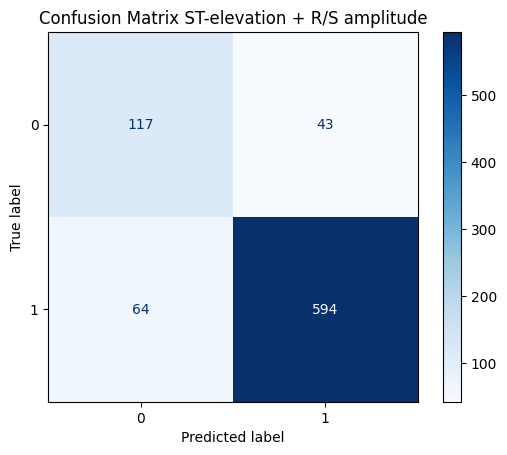

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix ST-elevation + R/S amplitude')
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# from niapy.problems import Problem
# from niapy.task import OptimizationType, Task
# from niapy.algorithms.basic import ParticleSwarmAlgorithm

# # Fungsi untuk mendapatkan hyperparameter dari nilai partikel
# def get_hyperparameters(x):
#     C = 10 ** x[0]
#     kernel = 'rbf' if x[1] >= 0.5 else 'linear'
#     gamma = 10 ** x[2]
#     return {'C': C, 'kernel': kernel, 'gamma': gamma}

# def get_classifier(x):
#     params = get_hyperparameters(x)
#     return SVC(**params)

# # Definisi masalah optimasi untuk SVM
# class SVMHyperparameterOptimization(Problem):
#     def __init__(self, X_train, y_train, X_test, y_test):
#         super().__init__(dimension=3, lower=[-1, 0, -1], upper=[2, 1, 2])  # C, kernel (binary), gamma
#         self.X_train = X_train
#         self.y_train = y_train
#         self.X_test = X_test
#         self.y_test = y_test

#     def _evaluate(self, x):
#         model = get_classifier(x)
#         model.fit(self.X_train, self.y_train)
#         y_pred = model.predict(self.X_test)
#         accuracy = accuracy_score(self.y_test, y_pred)
#         return -accuracy  # Negasikan akurasi untuk tujuan minimisasi

# # Langkah 1: Baca dataset fitur ST-elevasi, amplitudo RS, dan dataset kelas multiklas
# st_dataset = pd.read_csv('/content/gabunganfitur/STElevasi.csv')  # Dataset fitur ST-elevasi
# rs_dataset = pd.read_csv('/content/gabunganfitur/AmplitudoRS.csv')  # Dataset fitur RS
# class_dataset = pd.read_csv('/content/gabunganfitur/MIandNormal.csv')  # Dataset kelas multiklas

# # Hilangkan '.hea' dari kolom patient_id di dataset Amplitudo RS
# rs_dataset['patient_id'] = rs_dataset['patient_id'].str.replace('.hea', '', regex=False).str.strip()

# # Rename kolom 'Record Name' menjadi 'patient_id' di semua dataset untuk konsistensi
# st_dataset = st_dataset.rename(columns={'Record Name': 'patient_id'})
# class_dataset = class_dataset.rename(columns={'Record Name': 'patient_id'})

# # Bersihkan kolom 'patient_id' agar konsisten
# st_dataset['patient_id'] = st_dataset['patient_id'].str.strip().str.lower()
# rs_dataset['patient_id'] = rs_dataset['patient_id'].str.strip().str.lower()
# class_dataset['patient_id'] = class_dataset['patient_id'].str.strip().str.lower()

# # Langkah 2: Gabungkan dataset berdasarkan 'patient_id'
# merged_data = st_dataset.merge(rs_dataset, on='patient_id', how='inner')
# merged_data = merged_data.merge(class_dataset, on='patient_id', how='inner')

# # Langkah 3: Pisahkan fitur dan label
# X = merged_data[['st_mean', 'st_std', 'st_max', 'st_min', 'st_range',
#                  'Mean_RS', 'Max_RS', 'Min_RS', 'Std_RS']]  # Gabungan fitur
# y = merged_data['Class']  # Target label (multiklas)

# # Split data menjadi training dan testing set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Terapkan SMOTE untuk menyeimbangkan kelas pada data pelatihan
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Standarisasi fitur
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

# # Inisialisasi dan jalankan optimisasi hyperparameter
# problem = SVMHyperparameterOptimization(X_train_resampled, y_train_resampled, X_test, y_test)
# task = Task(problem, max_iters=50, optimization_type=OptimizationType.MINIMIZATION)
# algorithm = ParticleSwarmAlgorithm(population_size=20, seed=1234)

# best_params, best_accuracy = algorithm.run(task)

# # Tampilkan hasil optimasi
# print('Best parameters:', get_hyperparameters(best_params))
# print('Best accuracy:', -best_accuracy)

# # Evaluasi model terbaik
# best_model = get_classifier(best_params)
# best_model.fit(X_train_resampled, y_train_resampled)
# y_pred = best_model.predict(X_test)

# print(f"Akurasi Model Terbaik: {accuracy_score(y_test, y_pred) * 100:.2f}%")
# print("Laporan Klasifikasi:")
# print(classification_report(y_test, y_pred, zero_division=0))
